# Introduction

This is a dataset that I found on Kaggle. It documents various weather data across a 10 year span in Australia. The goal with this data is to build models to predict whether it will be raining tomorrow. The dataset contains a target variable called RainTomorrow with a No or Yes (1mm or more). 

Source - https://www.kaggle.com/jsphyg/weather-dataset-rattle-package

# Import Modules and Data

In [1]:
#Import modules 
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
import os as os
from sklearn.metrics import mean_squared_error
%matplotlib inline 
import sys
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
from sklearn.model_selection  import train_test_split, cross_val_score, KFold
from sklearn.model_selection import GridSearchCV

In [2]:
%pwd

'/Users/ChrisGochis/OneDrive - Rockhurst University/PREDICTIVE MODELS/BIA6303PredictiveModels/Assignment 2'

In [3]:
#import the weather data csv
weather = pd.read_csv('weatherAUS.csv', sep=',', engine='python')
weather.shape

(145460, 23)

# The Dataset

In [4]:
# Move Target Variable to front of dataframe
targetName = 'RainTomorrow'
targetSeries = weather[targetName]
del weather[targetName]
weather.insert(0, targetName, targetSeries)

In [5]:
weather.head()

,RainTomorrow,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,No,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,...,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No
1,No,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,...,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No
2,No,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,...,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No
3,No,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,...,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No
4,No,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,...,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No


In [6]:
weather.tail()

,RainTomorrow,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
145455,No,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,...,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No
145456,No,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,...,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No
145457,No,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,...,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No
145458,No,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,...,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No
145459,NaN,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,...,17.0,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No


# Since weather is best predictable locally, I want to focus on one city in Australia, Sydney. I will now filter the dataset down to the Sydney observations.

In [7]:
#Create dataframe where Location is Sydney
weather_syd=weather.query('Location == "Sydney"')
weather_syd.head()

,RainTomorrow,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
30176,Yes,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,NaN,NaN,...,20.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes
30177,Yes,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,NaN,NaN,...,13.0,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes
30178,Yes,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,NaN,NaN,...,2.0,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes
30179,Yes,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,NaN,NaN,...,20.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes
30180,Yes,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,NaN,NaN,...,6.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes


In [8]:
weather_syd.shape

(3344, 23)

In [9]:
#Drop date and location fields, they are not needed.
weather_syd=weather_syd.drop(['Date', 'Location'],axis=1)

In [10]:
weather_syd.dtypes

RainTomorrow      object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
dtype: object

Breakdown of the attributes from source - 

<ul>
<li>MinTemp - Minimum temperature in the 24 hours to 9am in degrees Celsius
<li>MaxTemp - Maximum temperature in the 24 hours from 9am in degrees Celsius
<li>Rainfall - 	Precipitation (rainfall) in the 24 hours to 9am in millimeters
<li>Evaporation - "Class A" pan evaporation in the 24 hours to 9am in millimeters
<li>Sunshine - 	Bright sunshine in the 24 hours to midnight in hours
<li>WindGustDir - Direction of strongest gust in the 24 hours to midnight in compass points
<li>WindGustSpeed - Speed of strongest wind gust in the 24 hours to midnight in kilometers per hour
<li>WindDir9am - Wind direction averaged over 10 minutes prior to 9 am in compass points
<li>WindDir3pm - Wind direction averaged over 10 minutes prior to 3 pm in compass points
<li>WindSpeed9am - Wind speed averaged over 10 minutes prior to 9 am in kilometers per hour
<li>WindSpeed3pm - Wind speed averaged over 10 minutes prior to 3 pm in kilometers per hour
<li>Humidity9am - Relative humidity at 9 am in percent
<li>Humidity3pm - Relative humidity at 3 pm in percent
<li>Pressure9am - Atmospheric pressure reduced to mean sea level at 9 am in hectopascals
<li>Pressure3pm - Atmospheric pressure reduced to mean sea level at 3 pm in hectopascals
<li>Cloud9am - Fraction of sky obscured by cloud at 9 am in eighths
<li>Cloud3pm - Fraction of sky obscured by cloud at 3 pm in eighths
<li>Temp9am - Temperature at 9 am in degrees Celsius
<li>Temp3pm - Temperature at 3 pm in degrees Celsius
<li>RainToday - Yes/No if rained today more than 1mm+
</ul>

TARGET VARIABLE

<ul>
<li>RainTomorrow - Yes/No if rained tomorrow more than 1mm
</ul>
    
Data was compiled and sourced from the Australian Government Bureau of Meteorology

In [11]:
#Check for Null Values
#weather.isna().any() - omitted for space

Lots of NaN in this dataframe. I am going to fill the integer/float values with thier variable mean, and since the categorical variables are mostly cardinal directions, I am going to remove those rows from the dataset. We have roughly 3,300 observations to work with, so we can lose some.

In [12]:
for col in weather_syd.columns[1:]:
    dType = weather_syd[col].dtype
    if dType == float or dType == int:
        weather_syd[col].fillna(value=weather_syd[col].mean(), inplace=True)

In [13]:
#weather.isna().any() - omitted for space

In [14]:
# Drop remaining NaN values. They are not needed.
weather_syd.dropna(inplace=True)

In [15]:
weather_syd.isna().any()

RainTomorrow     False
MinTemp          False
MaxTemp          False
Rainfall         False
Evaporation      False
Sunshine         False
WindGustDir      False
WindGustSpeed    False
WindDir9am       False
WindDir3pm       False
WindSpeed9am     False
WindSpeed3pm     False
Humidity9am      False
Humidity3pm      False
Pressure9am      False
Pressure3pm      False
Cloud9am         False
Cloud3pm         False
Temp9am          False
Temp3pm          False
RainToday        False
dtype: bool

In [16]:
weather_syd.shape

(2285, 21)

We still have over 2,000 observations to work with! Let's explore some of the characteristics.

In [17]:
#Convert Target variable from Yes/No to a 0 and 1
le_dep = preprocessing.LabelEncoder()
weather_syd['RainTomorrow'] = le_dep.fit_transform(weather_syd['RainTomorrow'])

In [18]:
#Convert remaining object fields into dummy variables, stored as new dataframe, weather_d.
#Dropping first of each dummy to keep feature space manageable.
weather_syd_d = pd.get_dummies(weather_syd, drop_first = True)
weather_syd_d.head()

,RainTomorrow,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Yes
31156,0,13.8,19.5,0.0,4.6,9.5,35.0,4.0,19.0,73.0,...,0,0,0,0,0,0,0,0,0,0
31159,0,16.5,21.1,1.2,6.2,6.6,56.0,26.0,20.0,62.0,...,0,0,0,0,0,0,0,0,0,1
31160,0,16.4,21.8,1.0,6.0,5.9,50.0,13.0,28.0,82.0,...,0,0,0,0,0,0,0,0,0,0
31161,1,16.7,23.9,0.4,7.0,2.8,39.0,7.0,19.0,81.0,...,0,0,0,0,0,0,0,0,0,0
31162,0,17.8,28.9,2.0,4.0,10.8,41.0,22.0,17.0,63.0,...,0,0,0,0,0,0,0,0,0,1


# Exploratory Data Analysis

In [19]:
weather_syd_d.describe()

,RainTomorrow,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Yes
count,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,...,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000
mean,0.260832,15.051116,23.280700,3.495492,5.311734,7.190440,41.760613,15.303282,19.751422,67.622172,...,0.018818,0.070460,0.063457,0.087090,0.048140,0.013129,0.055142,0.055142,0.035886,0.261707
std,0.439184,4.543949,4.491279,10.497717,2.784595,3.818992,12.974008,6.939280,7.456553,14.950889,...,0.135913,0.255976,0.243837,0.282028,0.214109,0.113853,0.228308,0.228308,0.186047,0.439660
min,0.000000,5.000000,11.700000,0.000000,0.000000,0.000000,17.000000,2.000000,2.000000,19.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,11.200000,20.000000,0.000000,3.200000,4.300000,31.000000,11.000000,15.000000,58.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,15.200000,23.200000,0.000000,5.000000,8.200000,41.000000,15.000000,20.000000,68.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,18.900000,26.300000,1.400000,7.200000,10.200000,50.000000,20.000000,24.000000,79.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,27.600000,45.800000,119.400000,18.400000,13.600000,96.000000,54.000000,57.000000,100.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Right away we can see that there is a wide range of weather happening in Sydney. Temperatures are ranging from 5 deg to 45.8 deg C. We can also see that more often than not, it does not rain in Sydney. Let's visualize the proportions of rain or no rain.

RainTomorrow
0    1689
1     596
Name: RainTomorrow, dtype: int64


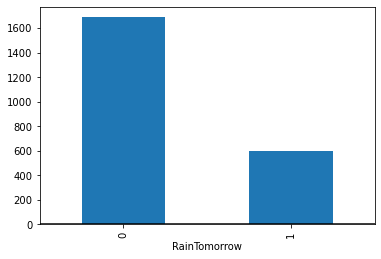

In [20]:
#Visualizing the difference in scale of wins between Blue (1) and Red (0) corners
groupby = weather_syd_d.groupby(['RainTomorrow'])
targetEDA=groupby['RainTomorrow'].aggregate(len)
print(targetEDA)
plt.figure()
targetEDA.plot(kind='bar', grid=False)
plt.axhline(0, color='k')

We can see from this graph and matrix that the data is fairly skewed to No rain, or 0. It appears that it only rains about 26% of the time in Sydney. Using this frequency, we can determine that for our models to be predictively significant, they need to be at least 74% accurate. Accuracy will be a good measurement for these models, and we will also need to pay attention to the recall and precision of Yes, or 1, to help us find our optimal model.

Let's see what other kind of information we can find in our EDA.

### Correlation Analysis

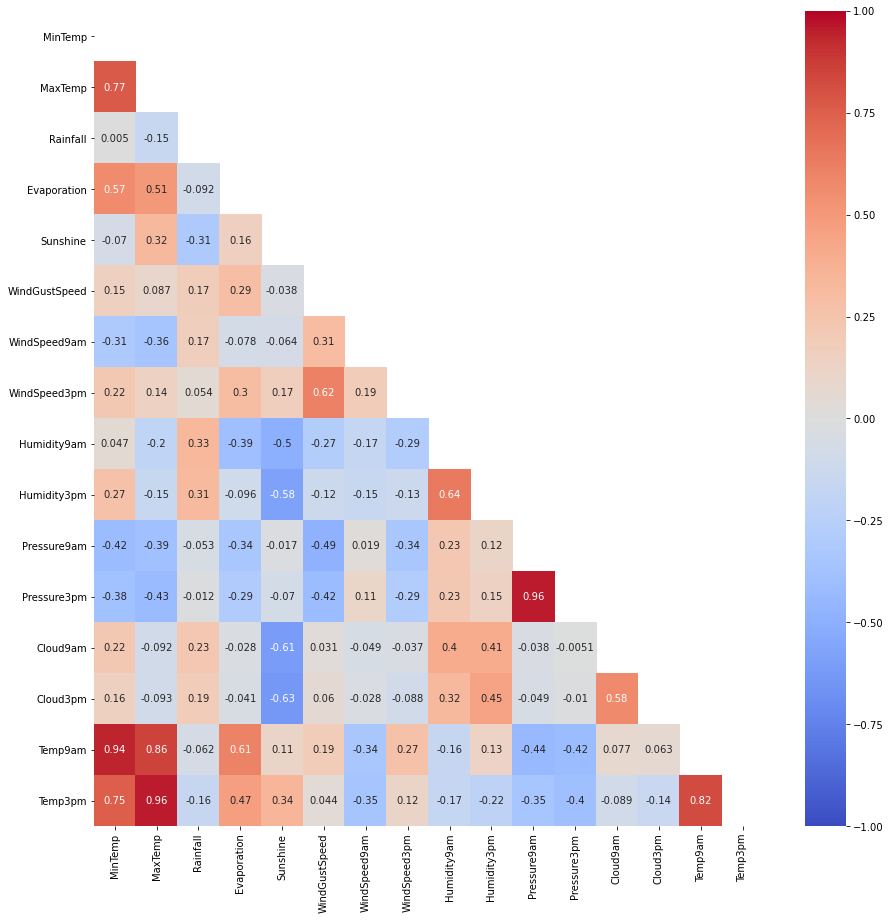

In [21]:
#Create correlation matrix
corr_matrix = weather_syd.iloc[:,1:].corr()
corr_matrix

import seaborn as sns

plt.figure(figsize=(15,15)) #need to adjust size as needed.
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr_matrix,
           vmin=-1,
           vmax=1,
           cmap='coolwarm',
           annot=True,
           mask=mask)
plt.show()

We can see some correlation happening between a handfull of our variables. First, we can see that both Cloud9am and Cloud3pm are negatively correlated to Sunshing, which makes sense. The more Sunshine, the less Cloud. We can also see that the temperatures and pressure from at 9am and 3pm are positively corelated. This also logically makes sense, unless we were to see a big change in those measurements at midday, they would stay relatively consistent.

At this stage we should be able to reduce our feature space a bit, cutting out some of the correlated variables. We will plan to remove Temp9am, Pressure9am, MinTemp, and Cloud9am. I am choosing to eliminate the 9am variables to keep them consistent, noting that the weather later in the day being closer to the following prediction day.

In [22]:
weather_syd_d.drop(columns=['Temp9am', 'Pressure9am', 'MinTemp', 'Cloud9am'], inplace=True)

In [23]:
weather_syd_d.head()

,RainTomorrow,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Yes
31156,0,19.5,0.0,4.6,9.5,35.0,4.0,19.0,73.0,56.0,...,0,0,0,0,0,0,0,0,0,0
31159,0,21.1,1.2,6.2,6.6,56.0,26.0,20.0,62.0,55.0,...,0,0,0,0,0,0,0,0,0,1
31160,0,21.8,1.0,6.0,5.9,50.0,13.0,28.0,82.0,58.0,...,0,0,0,0,0,0,0,0,0,0
31161,1,23.9,0.4,7.0,2.8,39.0,7.0,19.0,81.0,64.0,...,0,0,0,0,0,0,0,0,0,0
31162,0,28.9,2.0,4.0,10.8,41.0,22.0,17.0,63.0,48.0,...,0,0,0,0,0,0,0,0,0,1


I would like to explore some of the variables in relation to our target. I would like to see how Sunshine, Evaporation, Humidity, and Pressure all relate to our rain prediction. I will perform a series of plots to see this relationship.

### Sunshine vs. Rain Tomorrow

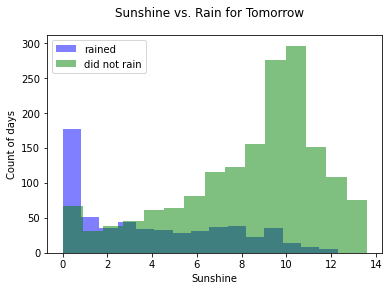

In [24]:
#Code credit to - https://medium.com/analytics-vidhya/tutorial-exploratory-data-analysis-eda-with-categorical-variables-6a569a3aea55

#Create histogram comparing RainTomorrow to Sunshine

fig, ax = plt.subplots()

ax.hist(weather_syd[weather_syd["RainTomorrow"]==1]["Sunshine"], bins=15, alpha=0.5, color="blue", label="rained")
ax.hist(weather_syd[weather_syd["RainTomorrow"]==0]["Sunshine"], bins=15, alpha=0.5, color="green", label="did not rain")

ax.set_xlabel("Sunshine")
ax.set_ylabel("Count of days")

fig.suptitle("Sunshine vs. Rain for Tomorrow")

ax.legend();

We can clearly see if the day had significant sunshine, then it did not end up raining the following day. This is what I was expecting to see. It appears that rain in these areas possibly require some buildup through the previous day to result in significant enought precipitation.

Next, I would like to see how Evaporation has an effect.

### Evaporation vs. Rain Tomorrow

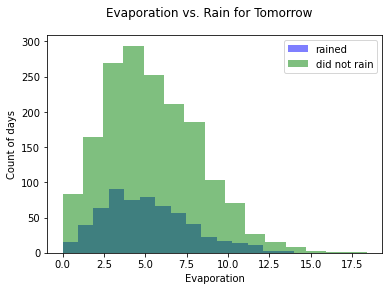

In [25]:
#Create histogram comparing RainTomorrow to Evaporation

fig, ax = plt.subplots()

ax.hist(weather_syd[weather_syd["RainTomorrow"]==1]["Evaporation"], bins=15, alpha=0.5, color="blue", label="rained")
ax.hist(weather_syd[weather_syd["RainTomorrow"]==0]["Evaporation"], bins=15, alpha=0.5, color="green", label="did not rain")

ax.set_xlabel("Evaporation")
ax.set_ylabel("Count of days")

fig.suptitle("Evaporation vs. Rain for Tomorrow")

ax.legend();

This is interesting. I assumed that a day with high evaporation would result in a greater count of rainy days. Instead what we find is that they are roughly the same. The difference in values we see here is in line with the target distribution.

Next, let's see how Humidity factors in. I will use Humidity readings from 3pm, since it is closest in time to the following day, i.e. our prediction.

### Humidity vs. Rain Tomorrow

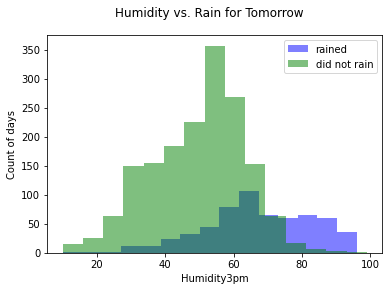

In [26]:
#Create histogram comparing RainTomorrow to Humidity3pm

fig, ax = plt.subplots()

ax.hist(weather_syd[weather_syd["RainTomorrow"]==1]["Humidity3pm"], bins=15, alpha=0.5, color="blue", label="rained")
ax.hist(weather_syd[weather_syd["RainTomorrow"]==0]["Humidity3pm"], bins=15, alpha=0.5, color="green", label="did not rain")

ax.set_xlabel("Humidity3pm")
ax.set_ylabel("Count of days")

fig.suptitle("Humidity vs. Rain for Tomorrow")

ax.legend();

This spread is more in line with my expectations. A higer humidity level late in the day does tend to create an increase in rainy days to follow.

Let's check and see how Pressure relates, I will continue the trend of 3pm.

### Pressure vs. Rain Tomorrow

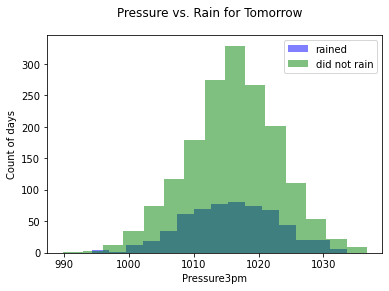

In [27]:
#Create histogram comparing RainTomorrow to Pressure3pm

fig, ax = plt.subplots()

ax.hist(weather_syd[weather_syd["RainTomorrow"]==1]["Pressure3pm"], bins=15, alpha=0.5, color="blue", label="rained")
ax.hist(weather_syd[weather_syd["RainTomorrow"]==0]["Pressure3pm"], bins=15, alpha=0.5, color="green", label="did not rain")

ax.set_xlabel("Pressure3pm")
ax.set_ylabel("Count of days")

fig.suptitle("Pressure vs. Rain for Tomorrow")

ax.legend();

This is interesting. It appears that Pressure skews slightly to the right, meaning that it does have some impact, just not as much as I expected to see.

One last comparison I would like to make is between RainToday and RainTomorrow. Are we going to typically see rain carry over into a second day? Or are they more isolated daily incidents?

### Rain Today vs. Rain Tomorrow

In [28]:
#Create Crosstab of Rain Tomorrow vs Rain Today

rain_cross=pd.crosstab(weather_syd_d.RainTomorrow, weather_syd_d.RainToday_Yes, colnames=['Rain Today'],rownames=['Rain Tomorrow'])
print(rain_cross)

Rain Today        0    1
Rain Tomorrow           
0              1394  295
1               293  303


Text(0.5, 1.0, 'Rain Tomorrow vs. Rain Today')

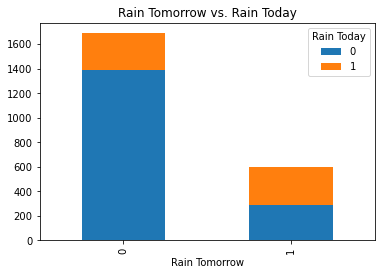

In [29]:
#Create stacked bar chart to visualize crosstab

rain_cross.plot(kind='bar', stacked=True)
plt.title('Rain Tomorrow vs. Rain Today')

We can see that rain today does seem to have somewhat of an impact. Of all our recorded days with rain, the following day recorded rain around 50% of the time. This tells us that when there is rain one day, there is a 50/50 chance that we will see rain the following day.

Through this EDA we can see that some of these variables, Sunshine and Humidity do have a positive impact to our chances of rain the following day. We can see that surprisingly, Evaporation has a slightly negative effect on our rain tomorrow chances. We have also learned that due to the neutral, almost normal distribution of effect that pressure has on our rain chances, it is not that impactful to the overall model.

# Predictive Classification Models

### Create Training and Test Sets

In [30]:
#Create a 70/30 split for our Training and Test sets.

from sklearn.model_selection  import train_test_split
features_train, features_test, target_train, target_test = train_test_split(
    weather_syd_d.iloc[:,1:].values, weather_syd_d.iloc[:,0].values, test_size=0.30, random_state=0)

print(features_train.shape)
print(target_train.shape)
print(features_test.shape)
print(target_test.shape)

(1599, 58)
(1599,)
(686, 58)
(686,)


## K-Nearest Neighbor (KNN)

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import make_pipeline
clf_knn = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=10))

#Train
clf_knn = clf_knn.fit(features_train, target_train)

#Validate
target_predicted_knn = clf_knn.predict(features_test)

print("Accuracy Score", accuracy_score(target_test, target_predicted_knn))
print("Precision Score", precision_score(target_test, target_predicted_knn))
print("Recall Score", recall_score(target_test, target_predicted_knn))
print(classification_report(target_test, target_predicted_knn))
print(confusion_matrix(target_test, target_predicted_knn))

#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(target_test, target_predicted_knn).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

Accuracy Score 0.7711370262390671
Precision Score 0.6470588235294118
Recall Score 0.24858757062146894
              precision    recall  f1-score   support

           0       0.78      0.95      0.86       509
           1       0.65      0.25      0.36       177

    accuracy                           0.77       686
   macro avg       0.72      0.60      0.61       686
weighted avg       0.75      0.77      0.73       686

[[485  24]
 [133  44]]
True Negatives:  485
False Positives:  24
False Negatives:  133
True Positives:  44


In [33]:
#Verify results with cross validation, 10 fold
scores = cross_val_score(clf_knn, features_train, target_train, cv=10)
print("Cross Validation Score for each K",scores)
scores.mean() 

Cross Validation Score for each K [0.75625    0.775      0.75625    0.80625    0.7625     0.775
 0.78125    0.81875    0.80625    0.77987421]


0.7817374213836479

#### Results:
For this model we tuned the number of neighbors. We performed n=3, n=5, and n=10. The best results came with n=10. We saw the highest level of accuracy and precision, however we did see the lowest level of recall. We can see that we are identifying 25% of rainy days, with 67% precision. We didn't seem to cast as wide of a net with n=10, but we were more precice when predicting those rainy days. Our crossvalidation confirms that our model is performing well with our data. We are still seeing accuracy ratings higher than our goal of 74%. 

### Decision Tree

In [38]:
#Build the Decision Tree
from sklearn import tree 
clf_dt = tree.DecisionTreeClassifier(random_state=123, max_depth = 5)
#print(clf_dt)

#Train
clf_dt = clf_dt.fit(features_train, target_train)

#Validate
target_predicted_dt = clf_dt.predict(features_test)
print("DT Accuracy Score", accuracy_score(target_test, target_predicted_dt))
print("DT Precision Score", precision_score(target_test, target_predicted_dt))
print("DT Recall Score", recall_score(target_test, target_predicted_dt))
print(classification_report(target_test, target_predicted_dt))

#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(target_test, target_predicted_dt).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

DT Accuracy Score 0.8090379008746356
DT Precision Score 0.6597222222222222
DT Recall Score 0.536723163841808
              precision    recall  f1-score   support

           0       0.85      0.90      0.88       509
           1       0.66      0.54      0.59       177

    accuracy                           0.81       686
   macro avg       0.75      0.72      0.73       686
weighted avg       0.80      0.81      0.80       686

True Negatives:  460
False Positives:  49
False Negatives:  82
True Positives:  95


In [43]:
#Verify results with cross validation, 10 fold
scores = cross_val_score(clf_dt, features_train, target_train, cv=10)
print("Cross Validation Score for each K",scores)
scores.mean() 

Cross Validation Score for each K [0.7625     0.8375     0.80625    0.81875    0.80625    0.81875
 0.85625    0.80625    0.8375     0.79874214]


0.8148742138364782

#### Results
The decision tree model was tuned using the max_depth parameter. I started with it as 'None', then tuned to 10, then 5. The best results so far have come from our pruned tree with a max_depth = 5. We can see that our accuracy has risen to 80% confirmed by our cross validation. We can also see that our recall has also increased over our KNN model, now at 54%. Our model is casting a wider net, and still maintaining somewhat steady precision, at 66%. This is a 1% decline from KNN but it also increase recall by nearly 30%.

### Random Forest

In [51]:
#Build Random Forest
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(max_features=4, n_estimators=100, random_state=123)

#Train
clf_rf.fit(features_train, target_train)

#Validate
target_predicted_rf = clf_rf.predict(features_test)
print("Accuracy Score", accuracy_score(target_test, target_predicted_rf))
print("Precision Score", precision_score(target_test, target_predicted_rf))
print("Recall Score", recall_score(target_test, target_predicted_rf))
print(classification_report(target_test, target_predicted_rf))

#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(target_test, target_predicted_rf).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

Accuracy Score 0.8396501457725948
Precision Score 0.7557251908396947
Recall Score 0.559322033898305
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       509
           1       0.76      0.56      0.64       177

    accuracy                           0.84       686
   macro avg       0.81      0.75      0.77       686
weighted avg       0.83      0.84      0.83       686

True Negatives:  477
False Positives:  32
False Negatives:  78
True Positives:  99


In [52]:
#Verify results with cross validation, 10 fold
scores = cross_val_score(clf_rf, features_train, target_train, cv=10)
print("Cross Validation Score for each K",scores)
scores.mean() 

Cross Validation Score for each K [0.80625    0.875      0.8375     0.8625     0.825      0.81875
 0.8375     0.825      0.86875    0.85534591]


0.8411595911949685

Let's see how we can tune this forest using a grid search!

In [48]:
# use a full grid over all parameters
from numpy import arange
import time
#param_grid = {"max_features": arange(0,50,5)} # FIRST TUNE
param_grid = {"max_features": arange(0,10,1)} # SECOND TUNE
start = time.time()

# run grid search
grid_search = GridSearchCV(clf_rf, param_grid=param_grid,n_jobs=-1, cv=10)
grid_search.fit(features_train, target_train)
end = time.time()
print("Time to run", round(end-start), "seconds")
print(grid_search.cv_results_)
print(*"BEST SCORE", grid_search.best_score_)
print(*"BEST PARAM", grid_search.best_params_)

Time to run 6 seconds
{'mean_fit_time': array([0.09892831, 0.46548204, 0.44467618, 0.45177779, 0.46223435,
       0.48029819, 0.4934303 , 0.51159234, 0.52935779, 0.50546045]), 'std_fit_time': array([0.01200233, 0.01647436, 0.01101355, 0.00379514, 0.0049368 ,
       0.00580139, 0.00790127, 0.00506155, 0.00618424, 0.06852648]), 'mean_score_time': array([0.        , 0.03043458, 0.02400825, 0.02467732, 0.02335408,
       0.02432017, 0.02293482, 0.02290351, 0.02306688, 0.01951938]), 'std_score_time': array([0.        , 0.00816526, 0.00127095, 0.00166244, 0.00100156,
       0.00307711, 0.00047236, 0.00028443, 0.00107431, 0.00325934]), 'param_max_features': masked_array(data=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value='?',
            dtype=object), 'params': [{'max_features': 0}, {'max_features': 1}, {'max_features': 2}, {'max_features': 3}, {'max_features': 4}, {'max_features':

#### Results
For this model, I will tuned the max_features parameter. I performed the default, 4, and 5 features. I used a grid search method to help find the best number of features. I first performed a grid search of 0-50 by 5. This suggested my best number of feature being 5, the results improveed over default. I then ran the grid search again by 0-10 by 1. This resulted in a number of 4. This also slightly improved our results to our best yet. We are now reaching an accuracy of 84% with Recall of 56% at 76% Precision. Our model is really performing well! We are over our goals! Let's keep improving to see if any further methods are better.